In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [2]:
df = pd.read_csv('datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


<Axes: >

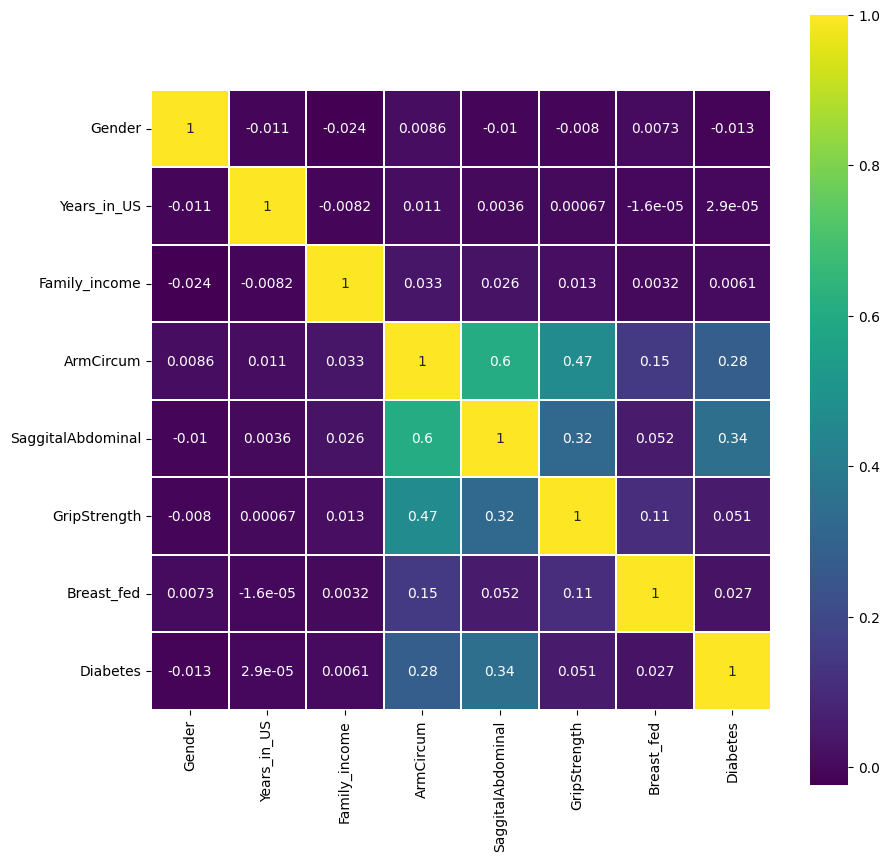

In [3]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [4]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [5]:
### Воспользуемся StandardScaler

### Your code is here

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [6]:
### Your code is here

kmeans = KMeans(n_clusters=3, tol=0.0005, random_state=1)
kmeans.fit(scaled_X_train)

KMeans(n_clusters=3, random_state=1, tol=0.0005)

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [7]:
### Your code is here

rf = RandomForestClassifier(random_state=1)
rf.fit(scaled_X_train, y_train)

lr = LogisticRegression(random_state=1)
lr.fit(scaled_X_train, y_train)

lsvc = LinearSVC(random_state=1)
lsvc.fit(scaled_X_train, y_train)

LinearSVC(random_state=1)

In [8]:
print(f'KMeans accuracy: {accuracy_score(y_test, kmeans.predict(scaled_X_test))}')
print(f'RandomForestClassifier accuracy: {accuracy_score(y_test, rf.predict(scaled_X_test))}')
print(f'LogisticRegression accuracy: {accuracy_score(y_test, lr.predict(scaled_X_test))}')
print(f'LinearSVC accuracy: {accuracy_score(y_test, lsvc.predict(scaled_X_test))}')

KMeans accuracy: 0.37204563977180116
RandomForestClassifier accuracy: 0.8859005704971475
LogisticRegression accuracy: 0.8875305623471883
LinearSVC accuracy: 0.8920130399348003


In [9]:
rf_norm = accuracy_score(y_test, rf.predict(scaled_X_test))
lr_norm = accuracy_score(y_test, lr.predict(scaled_X_test))
lsvc_norm = accuracy_score(y_test, lsvc.predict(scaled_X_test))

print(f'{rf_norm}\n{lr_norm}\n{lsvc_norm}')

0.8859005704971475
0.8875305623471883
0.8920130399348003


Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [10]:
### Your code is here

scaled_df_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

X_train_clust = pd.concat([scaled_df_X_train, pd.DataFrame(kmeans.predict(scaled_X_train), columns=['cluster'])], axis=1)
X_test_clust = pd.concat([scaled_df_X_test, pd.DataFrame(kmeans.predict(scaled_X_test), columns=['cluster'])], axis=1)

In [11]:
X_train_clust.isnull().sum()
X_test_clust.isnull().sum()

Gender               0
Years_in_US          0
Family_income        0
ArmCircum            0
SaggitalAbdominal    0
GripStrength         0
Breast_fed           0
cluster              0
dtype: int64

In [12]:
rf_2 = RandomForestClassifier(random_state=1)
rf_2.fit(X_train_clust, y_train)

lr_2 = LogisticRegression(random_state=1)
lr_2.fit(X_train_clust, y_train)

lsvc_2 = LinearSVC(random_state=1)
lsvc_2.fit(X_train_clust, y_train)

LinearSVC(random_state=1)

In [13]:
print(f'RandomForestClassifier accuracy: {accuracy_score(y_test, rf_2.predict(X_test_clust))}')
print(f'LogisticRegression accuracy: {accuracy_score(y_test, lr_2.predict(X_test_clust))}')
print(f'LinearSVC accuracy: {accuracy_score(y_test, lsvc_2.predict(X_test_clust))}')

RandomForestClassifier accuracy: 0.8879380603096985
LogisticRegression accuracy: 0.8875305623471883
LinearSVC accuracy: 0.8928280358598207


In [14]:
rf_2_accuracy = accuracy_score(y_test, rf_2.predict(X_test_clust))
lr_2_accuracy = accuracy_score(y_test, lr_2.predict(X_test_clust))
lsvc_2_accuracy = accuracy_score(y_test, lsvc_2.predict(X_test_clust))

print('{:.3f}, {:.3f}, {:.3f}'.format(rf_2_accuracy, lr_2_accuracy, lsvc_2_accuracy))

0.888, 0.888, 0.893


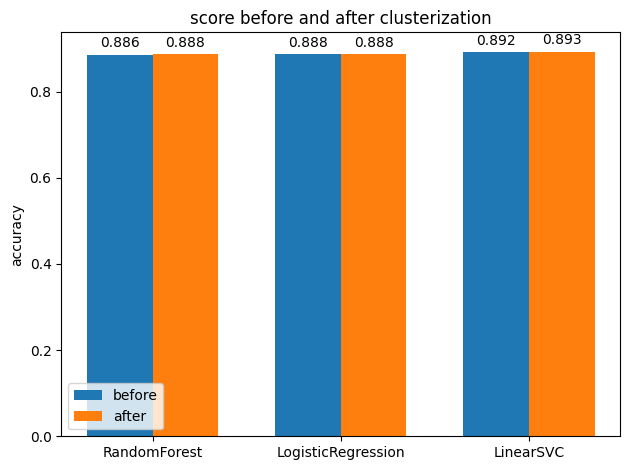

In [15]:
accuracy_before = [
    rf_norm,
    lr_norm,
    lsvc_norm
]

accuracy_after = [
    rf_2_accuracy,
    lr_2_accuracy,
    lsvc_2_accuracy
]

labels = [
    'RandomForest',
    'LogisticRegression',
    'LinearSVC'
]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
directs_1 = ax.bar(x-width/2, accuracy_before, width, label='before')
directs_2 = ax.bar(x+width/2, accuracy_after, width, label='after')

ax.set_ylabel('accuracy')
ax.set_title('score before and after clusterization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_label(directs):
    for direct in directs:
        height = direct.get_height()
        ax.annotate(
            '{:.3f}'.format(height),
            xy=(direct.get_x()+direct.get_width()/2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

add_label(directs_1)
add_label(directs_2)

fig.tight_layout()
plt.show()

Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [16]:
### Your code is here

distances_X_train = kmeans.transform(scaled_X_train)
distances_X_test = kmeans.transform(scaled_X_test)

rf_dist = RandomForestClassifier(random_state=1)
rf_dist.fit(distances_X_train, y_train)

lr_dist = LogisticRegression(random_state=1)
lr_dist.fit(distances_X_train, y_train)

lsvc_dist = LinearSVC(random_state=1)
lsvc_dist.fit(distances_X_train, y_train)

rf_dist_accuracy = accuracy_score(y_test, rf_dist.predict(distances_X_test))
lr_dist_accuracy = accuracy_score(y_test, lr_dist.predict(distances_X_test))
lsvc_dist_accuracy = accuracy_score(y_test, lsvc_dist.predict(distances_X_test))

print(f'RandomForestClassifier accuracy: {rf_dist_accuracy}')
print(f'LogisticRegression accuracy: {lr_dist_accuracy}')
print(f'LinearSVC accuracy: {lsvc_dist_accuracy}')

RandomForestClassifier accuracy: 0.8830480847595762
LogisticRegression accuracy: 0.8920130399348003
LinearSVC accuracy: 0.8920130399348003


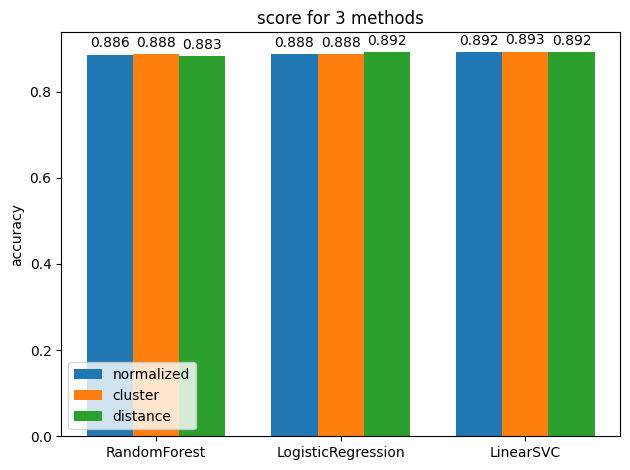

In [17]:
accuracy_norm = [
    rf_norm,
    lr_norm,
    lsvc_norm
]

accuracy_clust = [
    rf_2_accuracy,
    lr_2_accuracy,
    lsvc_2_accuracy
]

accuracy_dist = [
    rf_dist_accuracy,
    lr_dist_accuracy,
    lsvc_dist_accuracy
]

labels = [
    'RandomForest',
    'LogisticRegression',
    'LinearSVC'
]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
directs_1 = ax.bar(x-width, accuracy_norm, width, label='normalized')
directs_2 = ax.bar(x, accuracy_clust, width, label='cluster')
directs_3 = ax.bar(x+width, accuracy_dist, width, label='distance')

ax.set_ylabel('accuracy')
ax.set_title('score for 3 methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_label(directs):
    for direct in directs:
        height = direct.get_height()
        ax.annotate(
            '{:.3f}'.format(height),
            xy=(direct.get_x()+direct.get_width()/2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

add_label(directs_1)
add_label(directs_2)
add_label(directs_3)

fig.tight_layout()
plt.show()

**Задание 2** Задача кластеризации может использоваться не только для специфических задач группировки данных, но и для оптимизации других методов. Вы уже знаете, что одна из основных проблем kNN в скорости его предсказания. В этом задании попробуем ускорить работу kNN с помощью кластеризации, не теряя при этом сильно в качестве.

Сначала загрузим уже известные вам данные клиентов страховой компании.

In [18]:
data = pd.read_csv('vehicle_insurance.csv')
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [19]:
len(data)

10000

In [20]:
data = pd.get_dummies(data, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)
data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,True,False,True,True
1,76,1,3.0,0,33536.0,26.0,183,0,True,False,False,False
2,47,1,28.0,0,38294.0,26.0,27,1,True,False,True,True
3,21,1,11.0,1,28619.0,152.0,203,0,True,True,False,False
4,29,1,41.0,1,27496.0,152.0,39,0,False,True,False,False


In [21]:
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')

print(f1)

0.8278074237920785
